# Tugas Akhir (Final Submission) Dicoding
## Belajar Machine Learning untuk Pemula

Nama: Kemal Adam Roisy

Email: kemal.adam@sci.ui.ac.id

Alamat: Kota Jakarta Selatan, DKI Jakarta

In [1]:
# Import library yang diperlukan untuk menjalankan program
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile
import os, signal

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [2]:
print(tf.__version__)

2.5.0


In [3]:
# Mengunduh data training dengan wget command
# https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-07-07 15:44:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.2MB/s    in 48s     

2021-07-07 15:45:08 (6.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# Mengekstrak dataset dari filezip yang telah diunduh
source_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(source_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# Membuat variabel untuk alamat data untuk digunakan pada langkah-langkah berikutnya
base_dir = '/content/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

# Mengakses list nama file dari masing-masing kelompok gambar
rock_fnames = os.listdir(rock_dir)
paper_fnames = os.listdir(paper_dir)
scissors_fnames = os.listdir(scissors_dir)

# Melihat contoh nama file dari dataset
print(rock_fnames[:5])
print(paper_fnames[:5])
print(scissors_fnames[:5])


['9Ke26ZpKvhVSXl4V.png', 'qYTvWILCYIauIMkW.png', 'D7Ykcj1tYAannu8h.png', 'S9iRciyZ0OktMu7s.png', 'y7JyZqsFZUwdvkY2.png']
['5kJec3v9txvrAb4g.png', '4hcthlc3eCByBJFh.png', 'Zo0eTAGaUb4ewSkf.png', 'HyLg8tH9blwT6eVy.png', '3YvRoN0ZGuXVWEbh.png']
['XpFaeZAqFUqqJ85b.png', '1lEpWTJDphkm3HdC.png', 'TxkHaqZ5Mg3Jfs80.png', 'iYOrHPwEvEe7rXSL.png', 'Px1M92VqNpLveOTC.png']


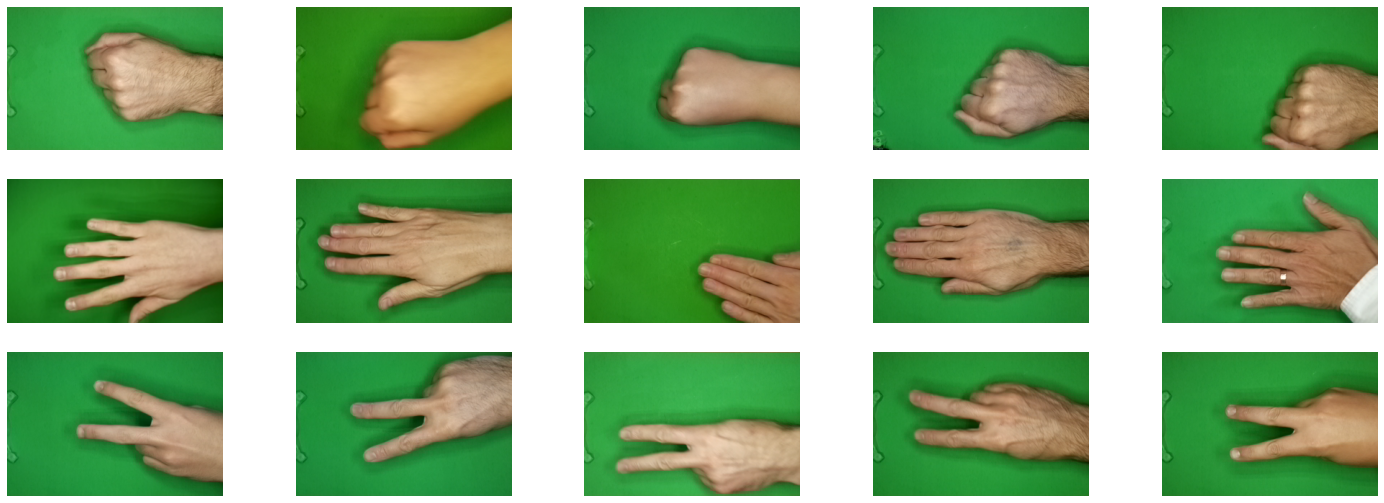

In [6]:
%matplotlib inline

# Kita akan cek masing-masing 5 gambar dari setiap kelompok
# Total 5 x 3 = 15 gambar yang di-plot
nrows = 3
ncols = 5

# index untuk iterasi
pic_index = 0

# Atur matplotlib fig dengan ukuran 5 x 3 gambar 
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3)

pic_index += 5
next_rock_pix = [os.path.join(rock_dir, fname) 
                for fname in rock_fnames[pic_index-5:pic_index]]
next_paper_pix = [os.path.join(paper_dir, fname) 
                for fname in paper_fnames[pic_index-5:pic_index]]
next_scissors_pix = [os.path.join(scissors_dir, fname) 
                for fname in scissors_fnames[pic_index-5:pic_index]]

for i, img_path in enumerate(next_rock_pix + next_paper_pix + next_scissors_pix):
  # Atur subplot, index sub plot dimulai dari 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Sembunyikan sumbu

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
# Set up ImageDataGenerator
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  zoom_range=0.2,
                  fill_mode='wrap',
                  validation_split=0.4
)

test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  zoom_range=0.2,
                  fill_mode='wrap',
                  validation_split=0.4
)

In [8]:
train_generator = train_datagen.flow_from_directory(
                      base_dir,
                      target_size=(100,150), # Resolusi data dengan perbandingan 2:3
                      batch_size=32,
                      shuffle=True,
                      subset='training',
                      seed=42)

validation_generator = test_datagen.flow_from_directory(
                      base_dir,
                      target_size=(100,150),
                      batch_size=32,
                      shuffle=True,
                      subset='validation',
                      seed=42)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
# Pembuatan Model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 64)         3

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(
            train_generator,
            steps_per_epoch=25,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=5,
            verbose=2
)

Epoch 1/20
25/25 - 8s - loss: 1.0910 - accuracy: 0.4455 - val_loss: 1.1226 - val_accuracy: 0.5125
Epoch 2/20
25/25 - 5s - loss: 0.8550 - accuracy: 0.6247 - val_loss: 0.8778 - val_accuracy: 0.6062
Epoch 3/20
25/25 - 5s - loss: 0.4126 - accuracy: 0.8350 - val_loss: 0.3795 - val_accuracy: 0.8813
Epoch 4/20
25/25 - 5s - loss: 0.4026 - accuracy: 0.8455 - val_loss: 0.2624 - val_accuracy: 0.9250
Epoch 5/20
25/25 - 5s - loss: 0.2858 - accuracy: 0.8909 - val_loss: 0.2295 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 6s - loss: 0.2715 - accuracy: 0.8913 - val_loss: 0.2785 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 5s - loss: 0.3607 - accuracy: 0.9000 - val_loss: 0.2687 - val_accuracy: 0.9062
Epoch 8/20
25/25 - 5s - loss: 0.2536 - accuracy: 0.9156 - val_loss: 0.1458 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 5s - loss: 0.2070 - accuracy: 0.9286 - val_loss: 0.1051 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 5s - loss: 0.2007 - accuracy: 0.9208 - val_loss: 0.1437 - val_accuracy: 0.9625
Epoch 11/20
25/25 -

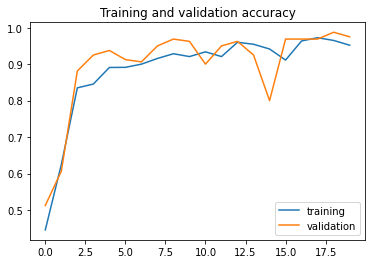

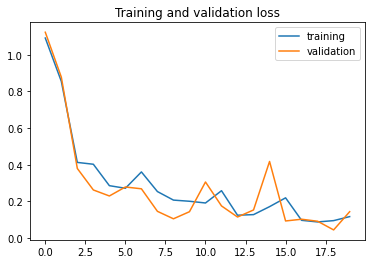

In [12]:
# Ambil list akurasi dari data training dan validation 
# set nilai akurasi untuk setiap epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Ambil list loss dari data training dan validation 
# set nilai loss untuk setiap epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['training', 'validation'], loc='lower right')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['training', 'validation'], loc='upper right')

Saving WhatsApp Image 2021-07-07 at 20.20.17.jpeg to WhatsApp Image 2021-07-07 at 20.20.17 (1).jpeg
WhatsApp Image 2021-07-07 at 20.20.17.jpeg
rock


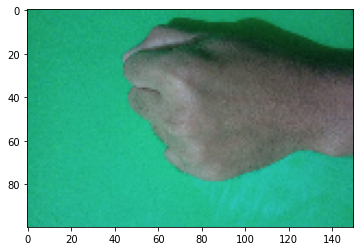

In [ ]:
%matplotlib inline

uploaded = files.upload()

for key in uploaded.keys():
    path = key
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(key)
    if classes[0,0] != 0:
        print('paper')
    elif classes[0,1] != 0:
        print('rock')
    else:
        print('scissors')

In [ ]:
# os.kill(os.getpid(), signal.SIGKILL)